In [88]:
import yaml

with open('intents.yml') as stream:
    intents = yaml.safe_load(stream)

# intents

Text(0, 0.5, 'Patterns')

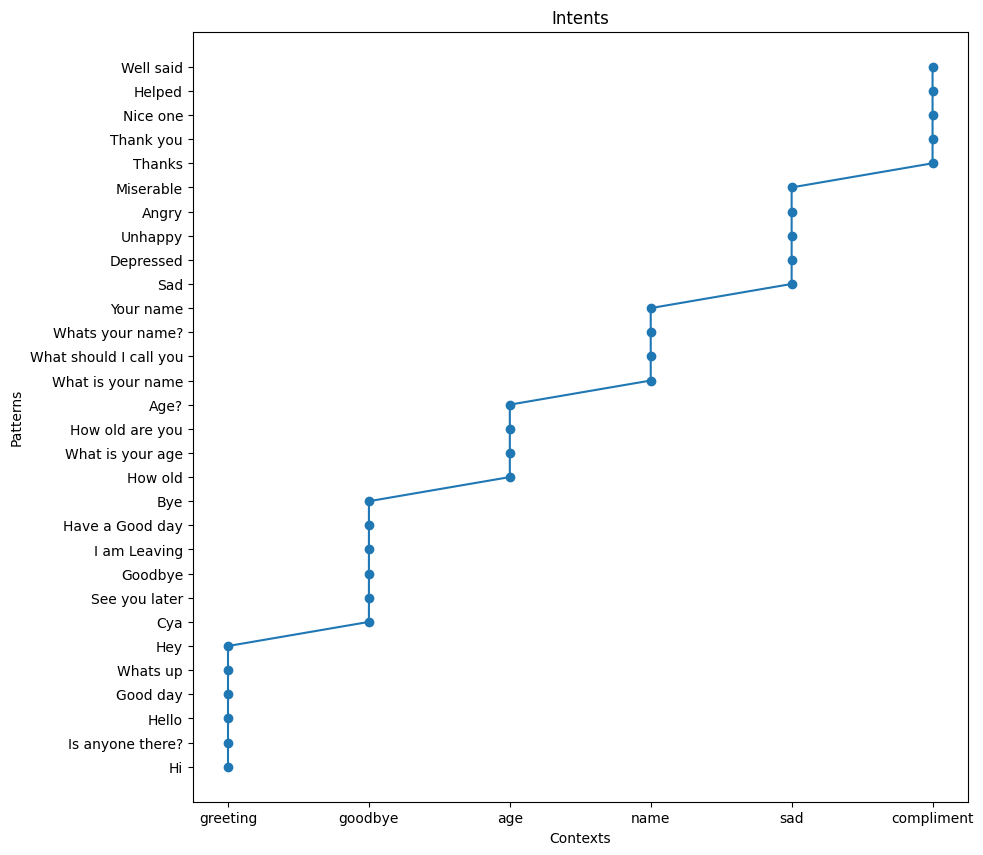

In [89]:
import matplotlib.pyplot as plt

patterns = []
contexts = []

for i in intents:
    for p in i['patterns']:
        patterns.append(p)
        contexts.append(i['context'])

plt.figure(figsize=(10, 10))
plt.plot(contexts, patterns, marker='o')
plt.title('Intents')
plt.xlabel('Contexts')
plt.ylabel('Patterns')

In [90]:
patterns

['Hi',
 'Is anyone there?',
 'Hello',
 'Good day',
 'Whats up',
 'Hey',
 'Cya',
 'See you later',
 'Goodbye',
 'I am Leaving',
 'Have a Good day',
 'Bye',
 'How old',
 'What is your age',
 'How old are you',
 'Age?',
 'What is your name',
 'What should I call you',
 'Whats your name?',
 'Your name',
 'Sad',
 'Depressed',
 'Unhappy',
 'Angry',
 'Miserable',
 'Thanks',
 'Thank you',
 'Nice one',
 'Helped',
 'Well said']

In [91]:
import nltk
import re
from nltk.stem import SnowballStemmer

stemmer = SnowballStemmer('english')

words = []
data = []
labels = []

for i in intents:
    for p in i['patterns']:
        p = re.sub(r'[^\w\s]', '', p.lower())

        tokenized_words = nltk.word_tokenize(p)
        stemmed_words = [stemmer.stem(w) for w in tokenized_words]

        words.extend(stemmed_words)

        data.append(stemmed_words)
        labels.append(i['context'])



In [92]:
data

[['hi'],
 ['is', 'anyon', 'there'],
 ['hello'],
 ['good', 'day'],
 ['what', 'up'],
 ['hey'],
 ['cya'],
 ['see', 'you', 'later'],
 ['goodby'],
 ['i', 'am', 'leav'],
 ['have', 'a', 'good', 'day'],
 ['bye'],
 ['how', 'old'],
 ['what', 'is', 'your', 'age'],
 ['how', 'old', 'are', 'you'],
 ['age'],
 ['what', 'is', 'your', 'name'],
 ['what', 'should', 'i', 'call', 'you'],
 ['what', 'your', 'name'],
 ['your', 'name'],
 ['sad'],
 ['depress'],
 ['unhappi'],
 ['angri'],
 ['miser'],
 ['thank'],
 ['thank', 'you'],
 ['nice', 'one'],
 ['help'],
 ['well', 'said']]

In [93]:
labels

['greeting',
 'greeting',
 'greeting',
 'greeting',
 'greeting',
 'greeting',
 'goodbye',
 'goodbye',
 'goodbye',
 'goodbye',
 'goodbye',
 'goodbye',
 'age',
 'age',
 'age',
 'age',
 'name',
 'name',
 'name',
 'name',
 'sad',
 'sad',
 'sad',
 'sad',
 'sad',
 'compliment',
 'compliment',
 'compliment',
 'compliment',
 'compliment']

In [138]:
from sklearn.preprocessing import LabelEncoder

label_encoder = LabelEncoder()
y = label_encoder.fit_transform(labels)
y

array([3, 3, 3, 3, 3, 3, 2, 2, 2, 2, 2, 2, 0, 0, 0, 0, 4, 4, 4, 4, 5, 5,
       5, 5, 5, 1, 1, 1, 1, 1], dtype=int64)

In [139]:
x = []

for wrds in data:
    bag = []
    print(wrds)
    for w in words:
        if w in wrds:
            bag.append(1)
        else:
            bag.append(0)

    x.append(bag)
    print(bag)

len(x), len(x[0])


['hi']
[1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0]
['is', 'anyon', 'there']
[0, 1, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0]
['hello']
[0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0]
['good', 'day']
[0, 0, 0, 0, 0, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0]
['what', 'up']
[0, 0, 0, 0, 0, 0, 0, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 1, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0]
['hey']

(30, 61)

In [140]:
import numpy as np

x = np.array(x)
y = np.array(y)
x.shape

(30, 61)

In [141]:
import tensorflow as tf

with tf.device('/CPU:0'):
    model = tf.keras.Sequential([
        tf.keras.Input(shape=(len(x[0]))),
        tf.keras.layers.Dense(10),
        tf.keras.layers.Dense(10),
        tf.keras.layers.Dense(len(set(y)), activation='softmax')
    ])

    model.compile(
        loss=tf.keras.losses.SparseCategoricalCrossentropy(),
        optimizer=tf.keras.optimizers.Adam(),
        metrics=['accuracy']
    )

    model.summary()
    
    history = model.fit(x, y, epochs=500, verbose=2)

Model: "sequential_2"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_6 (Dense)             (None, 10)                620       
                                                                 
 dense_7 (Dense)             (None, 10)                110       
                                                                 
 dense_8 (Dense)             (None, 6)                 66        
                                                                 
Total params: 796
Trainable params: 796
Non-trainable params: 0
_________________________________________________________________
Epoch 1/500
1/1 - 0s - loss: 1.7026 - accuracy: 0.2667 - 354ms/epoch - 354ms/step
Epoch 2/500
1/1 - 0s - loss: 1.6927 - accuracy: 0.3000 - 3ms/epoch - 3ms/step
Epoch 3/500
1/1 - 0s - loss: 1.6829 - accuracy: 0.3333 - 2ms/epoch - 2ms/step
Epoch 4/500
1/1 - 0s - loss: 1.6732 - accuracy: 0.3333 - 2ms/epoch - 2ms/step
Epoc

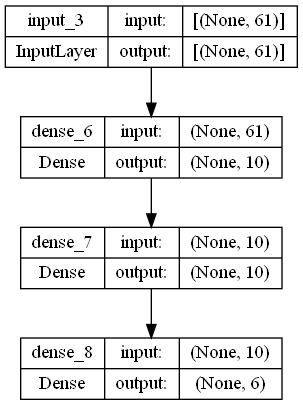

In [142]:
tf.keras.utils.plot_model(model, show_shapes=True)

<AxesSubplot:>

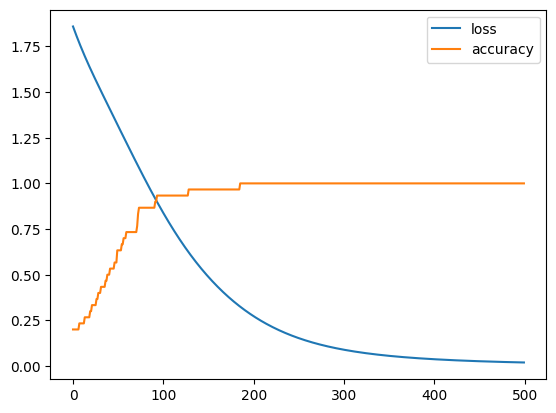

In [99]:
import pandas as pd

pd.DataFrame(history.history).plot()

In [144]:
def normalize_input(input):

    """
        Accept input as string to normalize. Return a container of normalized input.
    """

    stemmer = SnowballStemmer('english')

    tokenized_input = nltk.word_tokenize(input.lower())
    stemmed_input = [stemmer.stem(i) for i in tokenized_input]

    container = []

    for w in words:
        if w in stemmed_input:
            container.append(1)
        else:
            container.append(0)

    # Change shape from (x, ) to (1, x)
    return np.expand_dims(container, axis=0)

In [145]:
query = normalize_input('Whats up')
query.shape, query

((1, 61),
 array([[0, 0, 0, 0, 0, 0, 0, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
         0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 1, 0, 0, 0, 0, 1,
         0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0]]))

In [146]:
probabilities = model.predict(query)
prediction = np.argmax(probabilities)
prediction, probabilities

1/1 [==============================] - 0s 50ms/step


(3,
 array([[2.0603635e-03, 5.9636583e-05, 9.3429185e-07, 9.9482536e-01,
         3.0097393e-03, 4.4008961e-05]], dtype=float32))

In [147]:
labels[3]

'greeting'

In [151]:
context = label_encoder.inverse_transform([prediction])[0]
result = next(res for res in intents if res['context'] == context)
result

{'context': 'greeting',
 'patterns': ['Hi',
  'Is anyone there?',
  'Hello',
  'Good day',
  'Whats up',
  'Hey'],
 'responses': ['Hello', 'Hi', 'Greetings', 'Nice to meet you']}